<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [101]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [102]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####

In [103]:
# import df and print head
df = pd.read_csv('data/job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [105]:
# Using BeautifulSoup to strip html tags
df['description'] = [BeautifulSoup(text).get_text() for text in df['description']]
df.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


In [106]:
# df.drop(columns=['Unnamed: 0']) 

## 2) Use Spacy to tokenize the listings 

In [107]:
##### Your Code Here #####

In [108]:
# import library and model
import spacy
nlp = spacy.load("en_core_web_lg")

In [109]:
def lemma_producer(text):
    """
    tokenizes string, returning a list of lemmas
    """
    lemmas = []
    processed_text = nlp(text)
    
    for token in processed_text:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    return ' '.join(lemmas)

In [110]:
df['description'] = df['description'].apply(lemma_producer)

In [112]:
df['description'][0]

'b"Job requirements:\\nconceptual understanding Machine Learning model like nai\\xc2\\xa8ve Bayes K Means SVM Apriori Linear/ Logistic Regression neural Random Forests decision Trees K NN hand experience 2 them\\nintermediate expert level coding skill Python R. ability write function clean efficient datum manipulation mandatory role)\\nexposure package like NumPy SciPy Pandas Matplotlib etc Python GGPlot2 dplyr tidyR R\\nAbility communicate Model finding Technical Non technical stake holders\\nhand experience SQL Hive similar programming language\\nmust past work GitHub Kaggle publish article\\nmaster degree Statistics Mathematics Computer Science quant specific field.\\napply'

In [113]:
df['description'][1]

'b\'Job description\\n\\na Data scientist 1 help build machine learning model data pipeline micro service help client navigate healthcare journey empower improve generation Accolade Applications user experiences.\\nA day life\\xe2\\x80\\xa6\\nwork small agile team design develop mobile application iterative fashion.\\nwork tight knit group development team member Seattle.\\nContribute good practice help guide future applications.\\noperate effectively collaborative member development team.\\nOperates effectively individual quick turnaround enhancement fixes.\\nResponsible meet expectation deliverable time high quality.\\ndrive implement new feature mobile applications.\\nPerform thorough manual testing writing test case cover areas.\\nIdentify new development tool approach increase code quality efficiency good practices.\\ndevelop champion development process code style guideline architectural design necessary innovate maintain great product quality.\\neffectively turn design document 

In [114]:
df['description'][2]

"b'As Data scientist work consult business responsible analyze large complex dataset identify meaningful pattern lead actionable recommendation perform thorough testing validation model support aspect business datum analytics.\\nability statistical modeling build predictive model leverage machine learn algorithms.\\nthis position combine typical Data Scientist math analytical skill research advanced business communication presentation skills.\\nprimary job location Sacramento work home option available.\\n\\nqualifications\\nbachelor MS phd relevant field Computer Science Engineering Statistics Physics Applied math)\\nexperience R and/or Python prefer"

In [111]:
df.head()

,Unnamed: 0,description,title
0,0,"b""Job requirements:\nconceptual understanding ...",Data scientist
1,1,b'Job description\n\na Data scientist 1 help b...,Data Scientist I
2,2,b'As Data scientist work consult business resp...,Data Scientist - Entry Level
3,3,"b'$4,969 $ 6,756 monthcontractunder general su...",Data Scientist
4,4,b'Location USA \xe2\x80\x93 multiple locations...,Data Scientist


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [148]:
# another way to do it it keep groups of words
#vect = CountVectorizer(stop_words="english", min_df=0.025, max_df=0.98, ngram_range=(1,3))
vect = CountVectorizer(stop_words="english", min_df=0.025, max_df=0.98)

In [149]:
dtm = vect.fit_transform(df['description'])

In [150]:
print(dtm)

  (0, 705)	1
  (0, 1247)	1
  (0, 1502)	1
  (0, 764)	1
  (0, 731)	1
  (0, 832)	2
  (0, 744)	2
  (0, 1584)	1
  (0, 131)	1
  (0, 748)	1
  (0, 758)	1
  (0, 1224)	1
  (0, 918)	1
  (0, 1201)	1
  (0, 333)	1
  (0, 1488)	1
  (0, 604)	1
  (0, 492)	2
  (0, 497)	1
  (0, 736)	1
  (0, 215)	1
  (0, 1343)	1
  (0, 1186)	2
  (0, 14)	1
  (0, 1568)	1
  :	:
  (425, 1505)	1
  (425, 1383)	1
  (425, 1231)	1
  (425, 7)	1
  (425, 42)	1
  (425, 1089)	1
  (425, 955)	1
  (425, 151)	1
  (425, 681)	1
  (425, 314)	1
  (425, 634)	1
  (425, 836)	2
  (425, 1012)	1
  (425, 883)	1
  (425, 104)	1
  (425, 1369)	1
  (425, 1390)	1
  (425, 780)	1
  (425, 1177)	1
  (425, 917)	1
  (425, 1562)	1
  (425, 222)	1
  (425, 643)	1
  (425, 475)	1
  (425, 516)	2


In [151]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [152]:
# dtm to DataFrame
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,000,10,100,12,15,20,2019,25,3rd,40,...,x99ve,x9cbig,x9d,xa6,xae,xc2,xe2,year,years,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,8,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## 4) Visualize the most common word counts

In [165]:
##### Your Code Here #####
doc_len = [len(doc) for doc in dtm]

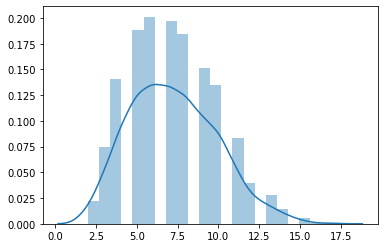

In [166]:
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [172]:
##### Your Code Here #####
tfidf = TfidfVectorizer(stop_words="english")

In [173]:
dtm = tfidf.fit_transform(df['description'])

In [174]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [175]:
dtm.head()

,ability,apriori,article,bayes,clean,coding,communicate,computer,datum,decision,...,statistics,svm,technical,tidyr,trees,understanding,work,write,xa8ve,xc2
0,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,...,0.102598,0.102598,0.205196,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598
1,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,...,0.102598,0.102598,0.205196,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598
2,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,...,0.102598,0.102598,0.205196,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598
3,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,...,0.102598,0.102598,0.205196,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598
4,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,...,0.102598,0.102598,0.205196,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598,0.102598


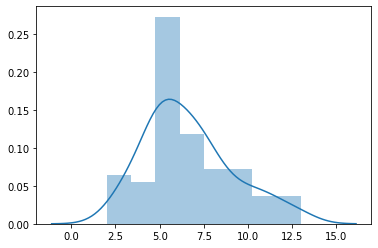

In [177]:
# plot 2 - word vizulaization
doc_len = [len(doc) for doc in dtm]
sns.distplot(doc_len);

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [179]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=3, algorithm='kd_tree')
model.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [180]:
test_string = ['I would like to live in a big city near a university. I would like to be responsible for working long hours in a atmosphere with very smart and talented people. I want a high salary.']

In [182]:
test_string = tfidf.transform(test_string)

In [183]:
test_string = test_string.todense()

In [184]:
predictions = model.kneighbors(test_string)

In [190]:
predictions

(array([[1.26079684, 1.26079684, 1.26079684]]), array([[425, 103, 211]]))

In [194]:
df['description'][425]

'b"Job requirements:\\nconceptual understanding Machine Learning model like nai\\xc2\\xa8ve Bayes K Means SVM Apriori Linear/ Logistic Regression neural Random Forests decision Trees K NN hand experience 2 them\\nintermediate expert level coding skill Python R. ability write function clean efficient datum manipulation mandatory role)\\nexposure package like NumPy SciPy Pandas Matplotlib etc Python GGPlot2 dplyr tidyR R\\nAbility communicate Model finding Technical Non technical stake holders\\nhand experience SQL Hive similar programming language\\nmust past work GitHub Kaggle publish article\\nmaster degree Statistics Mathematics Computer Science quant specific field.\\napply'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 